<a href="https://colab.research.google.com/github/Anatolii0208/ML_projects/blob/main/Monte_Carlo_for_Option_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import math
import datetime

In [3]:
# initial derivative parameters
S = 101.15          #stock price
K = 98.01           #strike price
vol = 0.0991        #volatility (%)
r = 0.01            #risk-free rate (%)
N = 10              #number of time steps
M = 1000            #number of simulations

market_value = 3.86 #market price of option
T = ((datetime.date(2022,3,17)-datetime.date(2022,1,17)).days+1)/365    #time in years
print(T)

0.1643835616438356


Monte Carlo simulation to estimate the price of a European call option.

1. **Constants**:
I calculate constants like `dt`, `nudt`, and `volsdt` for efficiency in the simulation loop.
2. **Standard Error Variables**: I initialise variables `sum_CT` and `sum_CT2` to accumulate values needed for calculating the option price and its standard error.
3. **Monte Carlo Method**:
    - The outer loop runs `M` times, representing the number of simulations.
    - The inner loop simulates the stock price path over `N` time steps using a geometric Brownian motion model.
    - `lnSt` is the natural logarithm of the stock price at each time step.
    - `np.random.normal()` generates random numbers from a standard normal distribution.
    - `ST` is the simulated stock price at maturity.
    - `CT` is the payoff of the call option at maturity, which is the maximum of 0 and `ST - K`.
    - `sum_CT` and `sum_CT2` accumulate the sum of payoffs and the sum of squared payoffs, respectively.
4. **Compute Expectation and SE**:
    - `C0` calculates the estimated call option price by taking the average of the discounted payoffs.
    - `sigma` calculates the standard deviation of the discounted payoffs.
    - `SE` calculates the standard error of the estimated call option price.

In [4]:
# Precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
lnS = np.log(S)

# Standard Error Placeholders
sum_CT = 0
sum_CT2 = 0

# Monte Carlo Method
for i in range(M):
    lnSt = lnS
    for j in range(N):
        lnSt = lnSt + nudt + volsdt*np.random.normal()

    ST = np.exp(lnSt)
    CT = max(0, ST - K)
    sum_CT = sum_CT + CT
    sum_CT2 = sum_CT2 + CT*CT

# Compute Expectation and SE
C0 = np.exp(-r*T)*sum_CT/M
sigma = np.sqrt( (sum_CT2 - sum_CT*sum_CT/M)*np.exp(-2*r*T) / (M-1) )
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,2)))


Call value is $3.75 with SE +/- 0.1


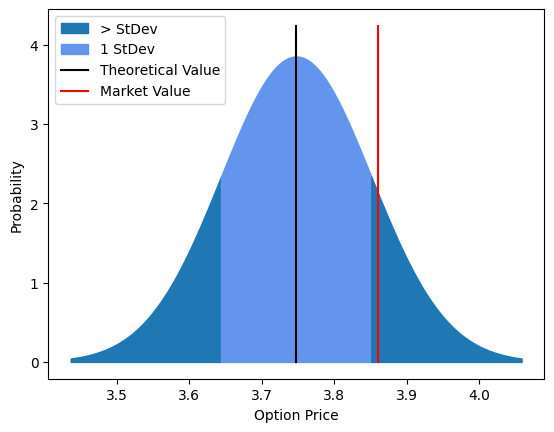

In [6]:
x1 = np.linspace(C0-3*SE, C0-1*SE, 100)
x2 = np.linspace(C0-1*SE, C0+1*SE, 100)
x3 = np.linspace(C0+1*SE, C0+3*SE, 100)

s1 = stats.norm.pdf(x1, C0, SE)
s2 = stats.norm.pdf(x2, C0, SE)
s3 = stats.norm.pdf(x3, C0, SE)

plt.fill_between(x1, s1, color='tab:blue',label='> StDev')
plt.fill_between(x2, s2, color='cornflowerblue',label='1 StDev')
plt.fill_between(x3, s3, color='tab:blue')

plt.plot([C0,C0],[0, max(s2)*1.1], 'k',
        label='Theoretical Value')
plt.plot([market_value,market_value],[0, max(s2)*1.1], 'r',
        label='Market Value')

plt.ylabel("Probability")
plt.xlabel("Option Price")
plt.legend()
plt.show()
